# Librería Scikit-learn,
## Scikit para los amigos

https://scikit-learn.org/stable/

<img src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png" width=300px/>

Es una librería para realizar machine-learning. Lo *interesante* para nosotros  no es hacer machine-learning -o puede que sí- sino las funcionalidades para **manipular datos.**

Como siempre, lo instalamos en nuestro entorno virtual

```bash
(entorno)$python3 -m pip install scikit-learn

```


https://scikit-learn.org/stable/user_guide.html


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
type(iris)

sklearn.utils.Bunch

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica

In [2]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [7]:
type(iris.data)

numpy.ndarray

In [6]:
iris.data.shape

(150, 4)

In [8]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [9]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [10]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Text(0, 0.5, 'sepal width (cm)')

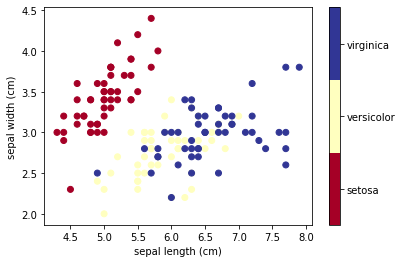

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)

plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

# Lo básico
https://scikit-learn.org/stable/modules/linear_model.html

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression(normalize=True)

In [33]:
x = np.arange(10)
y = 7 * x - 3

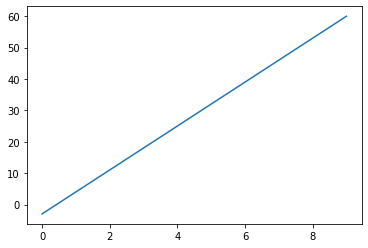

In [35]:
plt.plot(x, y)

### MUESTRAS + TIPO/Features

La serie X es nuestra muestra, necesitamos una característica más.
La serie Y es el tipo o valor a predecir.

In [36]:
X = x[:, np.newaxis]  #https://numpy.org/doc/stable/reference/arrays.indexing.html
print(X)
print("-"*10)
print(x.shape)
print("-"*10)
print(X.shape)
print(X[:,np.newaxis].shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
----------
(10,)
----------
(10, 1)
(10, 1, 1)


In [37]:
model.fit(X, y) #Entrenamiento del modelo

LinearRegression(normalize=True)

In [38]:
print(model.coef_) # Pendiente
print(model.intercept_) #Desplazamiento - Punto de corte

[7.]
-2.9999999999999964


$$f(x) = model.coef_ * x + model.intercept_$$

# Aprendizaje Supervisado
 - Datos con características y etiquetados
 - Objetivo predecir.
 - Clasificación y Regresión 
 
 https://scikit-learn.org/stable/supervised_learning.html
 
# Aprendizaje No supervisado
 - Datos con características pero sin etiquetar
 - Objetivo definir.
 - Clustering, estimadores de densidad, etc.
 
 https://scikit-learn.org/stable/unsupervised_learning.html

## Clasificación

In [41]:
# Example k nearest neighbors

from sklearn import neighbors, datasets

iris = datasets.load_iris()
X, y = iris.data, iris.target

model = neighbors.KNeighborsClassifier(n_neighbors=5)
model.fit(X, y)

#Una vez entrenado, clasificamos nuevos/existentes modelos:
result = model.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


## Regresión

In [47]:
# Example Random Forest
from sklearn.ensemble import RandomForestRegressor

iris = datasets.load_iris()
X, y = iris.data, iris.target

model = RandomForestRegressor()
model.fit(X, y)

result = model.predict([[3, 5, 4, 2],])
print(result) #Tiene sentido está técnica con los datos

[1.46]


## Clustering

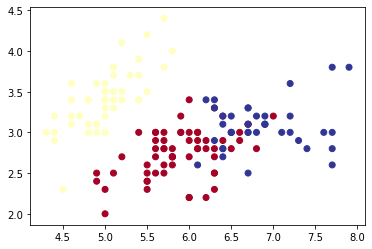

In [49]:
from sklearn.cluster import KMeans

iris = datasets.load_iris()
X, y = iris.data, iris.target

k_means = KMeans(n_clusters=3, random_state=0) 
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_pred,cmap='RdYlBu');

## Model Validation


In [51]:
from sklearn.neighbors import KNeighborsClassifier
X, y = iris.data, iris.target
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)
y_pred = clf.predict(X)
print(np.all(y == y_pred))

True


In [52]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, y_pred))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [53]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y) ## En la realidad no podemos usar todo el dataset

clf.fit(Xtrain, ytrain)
ypred = clf.predict(Xtest)
print(confusion_matrix(ytest, ypred))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


## Referencias
https://github.com/pagutierrez/tutorial-sklearn (Spanish)